<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Sub_Arreglo_M%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PROBLEMA DE OPTIMIZACIÓN**

El problema del sub-arreglo máximo se categoriza como un problema de optimización y consiste en encontrar el subarray cercano dentro de una matriz unidimensional de números que contiene la suma más grande. El tamaño del problema dependerá del tamaño de la entrada, como en este caso es un arreglo, dependerá de la cantidad de elementos que contenga.

![image](https://dsm01pap004files.storage.live.com/y4mhQFzQG0wih3KGAm9HW6lJqQqBnRYxSp_pmI35UrM2fFzsYdplhXX3kVrTfqtwGtxi8z1O5qeZaGQaYWUdeZ4Gq9QD3v2ByYaYsZAf8quuc46RRLZ4oibcZWswmgm4tS58TRGiyHr8w1eifCn3RR8hbwJANkDHusyn_xxKLDN7Jee2tJUMCJW30OtsQi4yw6Mj9BRFdX4ZoIqgzMAcYqeow/arreglo.png?psid=1&width=581&height=148)

Algunos puntos a considerar son:

- El problema también considera el subarreglo vacío; por convención, la suma de todos los valores del subarreglo vacío es 0.

- Si la matriz contiene todos los números no negativos, entonces un subarreglo máximo es el arreglo completo.

- Varias submatrices diferentes pueden tener la misma suma máxima.

## DATOS:

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Arreglo de números $[a_1 ... a_n]$, que va desde el elemento 1 hasta el n (total de elementos), estos pertenencen al conjunto de los reales. 

**↪ 𝚂𝚊𝚕𝚒𝚍𝚊:** Sub-arreglo $[a_i ... a_j]$ que contiene los valores que conforman la mayor suma en comparación a cualquier otro sub-arreglo de la matriz original, cabe destacar que los índices i y j $(i < j < n)$ son los índices correspondiente al inicio y final de la matriz original que compone al subarreglo. 

# **2. ALGORITMO MÁXIMO SUB-ARREGLO**

Este algoritmo se puede implementar como una solución a este problema de optimización, el objetivo es encontrar un arreglo dentro del arreglo original con elementos contiguos, donde la suma de estos elementos sea mayor a cualquier otro subarreglo de elementos contiguos.

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una lista o arreglo con un total de n elementos (n ∈ ℝ)

**↪ 𝚂𝚊𝚕𝚒𝚍𝚊:** Sub-arreglo $[a_i ... a_j]$ que contiene los valores que conforman la mayor suma, la suma correspondiente a los elementos y los índices de estos.

Para poder implementar esta solución, utilizaremos el conocido método "**Divide y vencerás**", la cual consiste solo en 3 pasos:

1. **𝙳𝚒𝚟𝚒𝚍𝚒𝚛** >> A través de la recursividad, dividiremos el arreglo en 2.

2. **𝙴𝚗𝚌𝚘𝚗𝚝𝚛𝚊𝚛** >> Buscamos el máximo subarreglo del lado derecho e izquierdo y luego el subarreglo que cruza el punto medio.

3. **𝙲𝚘𝚖𝚋𝚒𝚗𝚊𝚛** >> Devuelvemos el subarray máximo entre los 3 subarray encontrados anteriormente.

![image](https://dsm01pap004files.storage.live.com/y4mEMSnTX6BxTQfobcrrESqDCLFecsf_x9x2CybBQHIi27ZC8S_8R5HCRBco_AIKUlM0eWb_OVl0v0ZSX-_9SzIwA1TzXr-btMAUK_WxdSOrPgKFVTshRqxxXNWCZk7Y_r-PHiJadQymmZSEEPhQUOrC4tWJXh7WRRQnWMJrZTZb31evcj-ekUDNzHz2EzHGZYq-o70IiX_LKpw7vydEXCv2w/array%20descrp.png?psid=1&width=652&height=172)

## **2.1 Explicación maxSubArraySum**

Esta función recibe 5 parámetros; el array, el índice incial del arreglo, el índice final, un contador para revisar la cantidad de iteraciones y una flag para el verbose. 

Esta función es recursiva, donde divide el arreglo en 2 en cada iteración, para buscar el arreglo que maximiza la suma del arreglo original.

Cuando se llegue al caso base, es decir cuando el la división deje al arreglo de tamaño 1.

Luego, la función retornará el máximo del arreglo izquierdo, derecho y el cruce entre estos dos, es por esto que debe llamar a la función maxCrossingSum para que encuentre el array que maximiza la suma y finalmente retorna los índices del array y la suma.

In [398]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat
import numpy as np
import random
from termcolor import colored

In [399]:
def maxSubArraySum(array, izq, der, verbose=False):
    #Mejor caso.
    if (izq == der-1):
        return izq, der, array[izq]

    #Buscar punto medio.
    m = (izq + der) // 2

    if verbose:
      print("------------------------------------------------------------------")
      i_cruce, f_cruce, max_cruce = maxsubarraymid(array, izq, m, der, verbose)

    i_izq, f_izq, max_izq = maxSubArraySum(array,izq,m,verbose)
    i_der, f_der, max_Der = maxSubArraySum(array,m,der,verbose)
    i_cruce, f_cruce, max_cruce = maxsubarraymid(array,izq,m,der,verbose)

    if(max_izq > max_Der and max_izq > max_cruce):
      return i_izq, f_izq, max_izq

    elif(max_Der > max_izq and max_Der > max_cruce):
        return i_der, f_der, max_Der

    else: return i_cruce, f_cruce, max_cruce

## **2.2 Explicación maxCrossingSum**

La función recibe 5 parámetros; el array, el índice incial (l), el índice de la mitad del arreglo (m), el índice final (h) y la flag del verbose.

1. Busca el arreglo con la suma máxima del lado izquierdo que va desde índice incial hasta la mitad del arreglo original. 

2. Luego, buscar el arreglo con la suma máxima del lado derecho que va desde el índice de la mitad hasta el índice final del arreglo original.

En ambas partes, va recorriendo cada mitad y va sumando cada elemento a la variable *sm*. Para luego retornar el valor de la suma y los índices del subarreglo.

In [403]:
def maxsubarraymid(arr, l, m, h, verbose=False):
    
    #Elementos de izquierda al medio.
    sm = 0
    left_sum = float("-inf")
    cross_star = m

    for i in range(m-1, l-1, -1):
        sm += arr[i]
        if (sm > left_sum):
            left_sum = sm
            cross_star = i
            if verbose:
              print("Sub-arreglo izq >>", colored(f"{str(arr[cross_star:m])[1:-1]}","blue"))
              print("suma izq >>",left_sum,"\n")

    #Elementos del medio a la derecha.
    sm = 0
    right_sum = float("-inf")
    cross_end = m + 1
    if verbose:
      print()
    for i in range(m, h):
        sm += arr[i]
        if (sm > right_sum):
            right_sum = sm
            cross_end = i + 1
            if verbose:
              print("Sub-arreglo der >>",colored(f"{str(arr[m:cross_end])[1:-1]}","red"))
              print("suma der >>",right_sum,"\n")

    #Retorna index de inicio, index final y la suma de los valores del maximo sub-arreglo.
    return cross_star,cross_end,right_sum+left_sum

In [404]:
#Ejemplo
arr = random.sample(range(-100,100), 10)
n = len(arr)
start,end,max_sum = maxSubArraySum(arr, 0, n-1)

print("Array Entrada >>", arr)
print("Array Salida >>", arr[start:end])
print("Índice inicial >>",start)
print("Índice final >>",end-1)
print("Suma >>",max_sum)

Array Entrada >> [79, -74, 80, 30, -83, 35, 15, -100, -98, 27]
Array Salida >> [79, -74, 80, 30]
Índice inicial >> 0
Índice final >> 3
Suma >> 115


# **2.3 EJEMPLO**

Para poder entender de una mejor manera este algoritmo, veremos un ejemplo y su procedimiento en cada iteración de la recursividad.

Entrada: $[-1, 3, 4, -5, 9,-2]$ 

Salida: Índice incial: 1,  índice final: 4, suma: 11.

![image](https://dsm01pap004files.storage.live.com/y4m13OQTfn-_DRAN1KuJY4P-qhacCszVapxI6URQTUYJmlgbUq7u371q-xjHrQy5fv2JMluHFl46mKk-DOzzhukSYoFzIH9Y6U8GbMIP4PSIbhAPuiuTdlZsEF8GCvB4by_7_WMEHkNkphtCKLpHNNKMoRtsAlb7ySKAKjAaCFGwWHloul1X2Qdaal5EIB8NnMPBRaF1j8JHKHK9kqLCAbgPg/arbol.png?psid=1&width=505&height=568)
-------
------
1. Lo primero es llamar a la función *maxSubArraySum*, traspansandole el array y los índices 0 y 5, como tiene más de un elemento, se calcula la mitad y se divide, teniendo así $A_i = [-1, 3, 4]$, este procedimiento se realiza hasta llegar al caso base (array de un elemento) y luego lo retorna.

2. Luego, cuando ya tengamos nuestros arreglos de tamaño 1, llamamos a la función *maxCrossingSum* para ir sumando los elementos y encontrar el array del lado derecho, izquierdo y el cruce entre ambos que contenga la suma máxima.

3. Finalmente cuando termina todo el proceso, el algoritmo retorna los índices incial y final del subarreglo y el valor de la suma.

## **2.4 Algoritmo Paso a Paso (Ejemplo)**

In [405]:
arr = [-1, 3, 4, -5, 9,-2]
n = len(arr)
print("Arreglo incial >>", arr,"\n")
start,end,max_sum = maxSubArraySum(arr, 0, n, verbose=True)

print("------------------------------------------------------------------")
print("Sub-arreglo máximo >>", arr[start:end])
print("indice incial >>", start)
print("indice final >>", end)
print("Suma final >>", max_sum)

Arreglo incial >> [-1, 3, 4, -5, 9, -2] 

------------------------------------------------------------------
Sub-arreglo izq >> 4
suma izq >> 4 

Sub-arreglo izq >> 3, 4
suma izq >> 7 


Sub-arreglo der >> -5
suma der >> -5 

Sub-arreglo der >> -5, 9
suma der >> 4 

------------------------------------------------------------------
Sub-arreglo izq >> -1
suma izq >> -1 


Sub-arreglo der >> 3
suma der >> 3 

Sub-arreglo der >> 3, 4
suma der >> 7 

------------------------------------------------------------------
Sub-arreglo izq >> 3
suma izq >> 3 


Sub-arreglo der >> 4
suma der >> 4 

Sub-arreglo izq >> 3
suma izq >> 3 


Sub-arreglo der >> 4
suma der >> 4 

Sub-arreglo izq >> -1
suma izq >> -1 


Sub-arreglo der >> 3
suma der >> 3 

Sub-arreglo der >> 3, 4
suma der >> 7 

------------------------------------------------------------------
Sub-arreglo izq >> -5
suma izq >> -5 


Sub-arreglo der >> 9
suma der >> 9 

------------------------------------------------------------------
Sub-

# **3. CORRECTITUD**

## **3.1 CORRECTITUD MaxSubArraySum**
La función *MaxSubArraySum* recibe el arreglo de n elementos, con el objetivo de encontrar el subarreglo máximo, retornando los índices $i$ y $j$ tal que  y la suma máxima.

## Prueba del Teorema
Para poder probar el teorema, utilizaremos la **inducción matemática**, ya que el algoritmo contiene recursividad.

Para probar una declaración $P(n)$ en inducción matemática, debemos:

1. Probar $P(n)$ para un caso base, por ejemplo P(1)
2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** En este caso, el arreglo contiene sólo un elemento, como es el único retornandolo inmediatamente, por lo que podemos deducir que corresponde a la máxima suma que se puede generar.
>
> **Caso Promedio:** En el caso promedio, la función iterativamente divide el arreglo en 2, teniendo así $a = n/2$ y $b = n/2$. Cómo la función  es recursiva, llegará al caso base, retornando sólo un elemento. Como el algoritmo encuentra la suma máxima y cada arreglo tiene tamaño n/2, se asume que el paso inductivo es correcto ya que $1 < a < b < n$.

Cómo el caso base y el caso promedio son correctos y la función retorna un subarreglo que maximiza la suma, el teorema de correctitud es correcto.

## **3.2 CORRECTITUD maxsubarraymid**

Ya que la función *maxsubarraymid* itera de distinta forma según el caso, para probar el teorema utilizaremos la **propiedad invariante**.

> **Inicialización:** Al comienzo de la iteración, las variables de suma para la mitad izquierda y derecha comienzan con el valor de $- ∞$ asegurandonos que antes de revisar los elementos la suma de estos será mayor, así asumiendo que el subarreglo contiene la máxima suma.
>
> **Mantención:** Durante la iteración, sólo en caso que la suma de los elementos sea mayor a nuestra variable fija (right_sum o left_sum) se irán actualizando, es por esto que en todo momento estará guardada la suma máxima. Retornando la máxima suma entre los 3 casos, la del subarreglo derecho, izquierdo o el cruce en el punto medio.



# **4. TIEMPO DE EJECUCIÓN**

#Teorema (tiempo de ejecución)

El algoritmo **divide y vencerás** para el problema del sub-arreglo máximo consiste en dividir el arreglo por la mitad por el índice del medio, realizando llamadas recursivas en cada uno de los dos sub-arreglos para encontrar el sub-arreglo máximo en la mitad izquierda y mitad derecha, con esa premisa podemos determinar que: 

***T(n)=*** \begin{cases}
  O(1)  & n \text{ es 1} \\
  2 T(n/2) + O(n) & n \text{ es más de 1 elemento}
\end{cases}

Usando el teorema maestro visto en clases, se puede identificar que corresponde al caso número 1 donde a=b^d, por ende, podemos determinar que el tiempo de complejidad es = **O(n * log(n))**

# **5. EXPERIMENTOS**

En esta sección, compararemos a través de gráficos distintos aspectos entre el algoritmo Sub-Arreglo Máximo (forma divide y vencerás) v/s el algoritmo Kadane.

# **5.1 Algoritmo Kadane**

In [388]:
def maxSubArraySumKAD(a,size):
      
    max_so_far = a[0]
    max_ending_here = 0
      
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if max_ending_here < 0:
            max_ending_here = 0
          
        # Do not compare for all elements. Compare only   
        # when  max_ending_here > 0
        elif (max_so_far < max_ending_here):
            max_so_far = max_ending_here
              
    return max_so_far

## **5.2 Gráfica Tiempo de Ejecución**

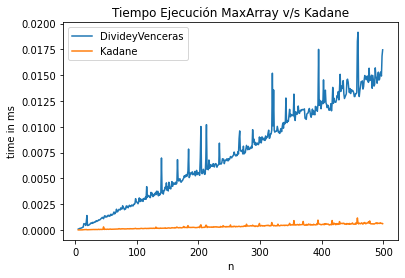

In [391]:
w=[]; r=[]; y=[]

for j in range(5,500):

  e = random.sample(range(1, 1000), j)

  l = repeat(setup="from __main__ import maxSubArraySum", stmt=f"maxSubArraySum({e},{0},{j})", repeat=1, number=10)
  u = repeat(setup="from __main__ import maxSubArraySumKAD", stmt=f"maxSubArraySumKAD({e},{j})", repeat=1, number=10)

  w.append(j)
  r.append(l)
  y.append(u)


plt.plot(w,r)
plt.plot(w,y)
plt.legend(["DivideyVenceras","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo Ejecución MaxArray v/s Kadane')
plt.show()

## **5.3 Análisis y Resultados**

Si observamos detenidamente el gráfico presentado anteriormente, podemos apreciar una gran diferencia entre el tiempo de ejecución del algoritmo Sub-Arreglo máximo en comparación al algoritmo Kadane. Otro punto a concluir es que el algoritmo Kadane tiene un comportamiento casi lineal, mientral que el Maximo Arreglo tiene una complejidad de O(n * log(n)).

Como conclusión final, podemos decir que el algoritmo Kadane es el más óptimo para solucionar este tipo de problemas de optimización.